# Data Engineering Test: Amazon Product Review.


* Hello World, in this notebook we would working on justfiying the approach and practices we implemented on the Amazon Product Review dataeset

* This would include how we transformed the necessary columns/features, dropped the unneccessary columns, performed data cleaning, highlighting errors to be corrected for further Business Intelligence practices. 

* Welcome and let's get to it.

# The Dataset 

- The dataset consists of samples from Amazon Ratings for some selected products. The reviews are picked randomly and the corpus has nearly 1.6k reviews from different customers.

### DATA COLUMNS:

- `id` - The unique ID of the review.
- `asins` - ASIN (Amazon Standard Identification Number): A unique identifier of 10 letters and/or numbers for a product assigned by Amazon.com
- `brand` - Product brand.
- `categories` - Product Category.
- `colors` - The color of the Product.
- `dateAdded` - Product Added Date.
- `dateUpdated` - Product Update Date.
- `dimension` - The dimension of the Product. 
- `manufacturer` - The Product Manufacturer.
- `manufacturerNumber` - The Product Manufacturer Number.
- `name` - The name of the Product.
- `prices` - The price of the Product,
- `reviews.date` - The Product review date.
- `reviews.doRecommend` - Product Recommendation.
- `reviews.numHelpful` - The number of helpful upvotes for reviews. 
- `reviews.rating` - The Product Rating. 
- `reviews.username` - The product Review User Username.
- `weight` - Product Weight.

### Deliverables (`Business Requirements`)

- Q: Write a python script to transform the data into a usable format for a BI Analyst.

    - +: The transformation can generate more than one table if needed.

- Q: Analyze the data.

    - +: Highlight critical errors that need to be corrected before the BI analyst can make use of the data.

## Step 0: Initiate Libraries




In [1]:
import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

# Key Libraries
import numpy as np
import pandas as pd


# Datetime
import datetime
import datetime as dt 


# Data Visualisation 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
%matplotlib inline
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

## Step 1: Data Discovery (Building Intuition)

- This is a technique we use to get an initial feel for our data tables.
- We read the data using pandas and perform method calls.
- Standardize dataset columns in the correct format.
- Explore Descriptive Statistics on Numerical Columns and more below:

## Step 1.1: Read Data

- Here will we be reading the `Amazon Product Review` 'csv' file into our jupyter notebook.
- Please note that the file name has been chnaged to `data.csv` for our convinience :).
- The variable name for the Amazon Prodcut Review data would be called `dataset` .

In [10]:
dataset = pd.read_csv('/content/drive/MyDrive/Amazon Product Review.csv')

## Step 1.2: View the data.

-  `dataset.head(2)`  - top 2 rows.
-  `dataset.tail(2)` -  last 2 rows.
- To gain intuition for transformations.

In [11]:
# Top 5 rows
dataset.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,manufacturer,manufacturerNumber,name,prices,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.username,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-08-08T00:00:00.000Z,NaN,139.0,5.0,Cristina M,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-09-01T00:00:00.000Z,NaN,126.0,5.0,Ricky,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-07-20T00:00:00.000Z,NaN,69.0,4.0,Tedd Gardiner,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2017-06-16T00:00:00.000Z,NaN,2.0,5.0,Dougal,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,Amazon,NaN,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2016-08-11T00:00:00.000Z,NaN,17.0,5.0,Miljan David Tanic,205 grams


In [12]:
# Last 5 rows 
dataset.tail()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,manufacturer,manufacturerNumber,name,prices,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.username,weight
1592,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,DR49WK,Alexa Voice Remote for Amazon Fire TV and Fire...,"[{""amountMax"":29.99,""amountMin"":29.99,""currenc...",2016-07-06T00:00:00.000Z,NaN,9.0,3.0,GregAmandawith4,4 ounces
1593,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,DR49WK,Alexa Voice Remote for Amazon Fire TV and Fire...,"[{""amountMax"":29.99,""amountMin"":29.99,""currenc...",2016-06-22T00:00:00.000Z,NaN,41.0,1.0,Amazon Customer,4 ounces
1594,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,DR49WK,Alexa Voice Remote for Amazon Fire TV and Fire...,"[{""amountMax"":29.99,""amountMin"":29.99,""currenc...",2016-03-31T00:00:00.000Z,NaN,34.0,1.0,Amazon Customer,4 ounces
1595,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,DR49WK,Alexa Voice Remote for Amazon Fire TV and Fire...,"[{""amountMax"":29.99,""amountMin"":29.99,""currenc...",2016-04-26T00:00:00Z,NaN,7.0,3.0,Meg Ashley,4 ounces
1596,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,DR49WK,Alexa Voice Remote for Amazon Fire TV and Fire...,"[{""amountMax"":29.99,""amountMin"":29.99,""currenc...",2016-07-31T00:00:00Z,NaN,10.0,1.0,DIANE K,4 ounces


### Based on the information above:

There will be some work needed in order to delivered for `Business Intelligence` purposes.

## `dataset.info()`

- It is an important and widely used method of Python. 
- This Method prints the information or summary of the dataframe. 
- It prints the various information of the Dataframe such as index type, dtype, columns, non-values, and memory usage. It gives a quick overview of the dataset.
- Info Method to get the Non-Null Count & Dtype (data type) of the dataset,
- Validate if a column and column type aligns with the format of the Business Requirements. 

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1597 non-null   object 
 1   asins                1597 non-null   object 
 2   brand                1597 non-null   object 
 3   categories           1597 non-null   object 
 4   colors               774 non-null    object 
 5   dateAdded            1597 non-null   object 
 6   dateUpdated          1597 non-null   object 
 7   dimension            565 non-null    object 
 8   manufacturer         965 non-null    object 
 9   manufacturerNumber   902 non-null    object 
 10  name                 1597 non-null   object 
 11  prices               1597 non-null   object 
 12  reviews.date         1217 non-null   object 
 13  reviews.doRecommend  539 non-null    object 
 14  reviews.numHelpful   900 non-null    float64
 15  reviews.rating       1177 non-null   f

Based on this information above:


- `id` & `asin` have same entries. no nulls, but inspect for unique values.
- There are two Product brands: `Amazon` & `Moshi.`
- A single `asin` can have many `names`.
- The `categories` columns needs to be categoried. / Need a table of their own.
- The data types for `dateAdded` , `dateUpdated` , `reviews.date` would be Transformed to `datetime` dtype format for Parsing Dates.
- The `colors` column would be dropped. Values are not even on the rainbow.
- The `dimension` column would be dropped. No purpose + 64% of data are null values
- The `manufacturer` : ['Amazon' nan 'AMDSI'] are the unique Manufacturers. Will replace nans with 'Unknown'
- The `manufacturerNumber` column would be dropped: Redundant data, 47.7% are null values. `id`/`asins` are similar.
- The `name` column would be modified into bins/categories of Product Name. There are similar entries in different rows. Idea: Groupby?
- The `prices` column needs thorough cleaning. Data from list in record entry.
- The `reviews.date` `datetime` dtype format for Parsing Dates.
- The `reviews.doRecommend` column is a Yes/No {`boolean`} data type. High Class imbalance on this table column. Also contains 60% dirty data, Dropped.
- The `reviews.numHelpful` column null values can be replaced to 0. Assuming there were no helpful reviews.
- The `weight` column would be dropped. as we are not using it for any purpose(Those are basically for weights).
- There are 1580 username entries, cleaning to be done.

## Step 1.3: Descriptive Statistics 

- Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values. 

In [14]:
dataset.describe()

,reviews.numHelpful,reviews.rating
count,900.000000,1177.000000
mean,83.584444,4.359388
std,197.150238,1.021445
min,0.000000,1.000000
25%,0.000000,4.000000
50%,0.000000,5.000000
75%,34.000000,5.000000
max,997.000000,5.000000


Based on the descriptive statistics above, we see the following:

- Average review score of ~4.36, with low standard deviation.
- Most review are positive from 2nd quartile onwards.
- The average for number of reviews is ~83.58.
- The range of most reviews will be between 0-197 people finding helpful (reviews.numHelpful)
- The most helpful review was helpful to 997 people which is great.
- This could be a detailed, rich review that will be worth looking at.

## Step 1.4: `dataset.shape`

- Return a tuple representing the dimensionality of the DataFrame.
- Number of rows and column entries.

In [15]:
# .shape method 
print(' -> Dimensionality : ',dataset.shape) 

# computing number of rows
rows = len(dataset.axes[0])
 
# computing number of columns
cols = len(dataset.axes[1])
 
# Print Num of Rows & Columns 
print(" -> Number of Rows : ", rows)
print(" -> Number of Columns : ", cols)

# Total Reviews 
print(' -> Total Amazon Product Reviews : ',dataset.id.count())

# Total Product Reviews 
print(' -> Total Amazon Products : ',dataset.name.count())

 -> Dimensionality :  (1597, 18)
 -> Number of Rows :  1597
 -> Number of Columns :  18
 -> Total Amazon Product Reviews :  1597
 -> Total Amazon Products :  1597


## Step 1.5: `Distinct Column Entries` & 

- To familiarise ourselves before we call the `.info` method.

In [16]:
# Distinct Brands
print(' -> Unique Brands : ',dataset.brand.unique())

# Number of Distinct 'names'
print(' -> Unique Product Name : ',dataset.name.nunique())

# Number of Distinct 'colors'
print(' -> Unique Colors: ',dataset.colors.unique())

# Number of Distinct 'Rating Reviews'
print(' -> Unique Rating Reviews: ',dataset['reviews.rating'].unique())

# Number of Distinct 'Rating Reviews'
print(' -> Unique Rating Usernames: ',dataset['reviews.username'].nunique())

# Number of Distinct 'Product Recommendations'
print(' -> Unique Product Recommendations: ',dataset['reviews.doRecommend'].unique())

# Number of Distinct 'IDS '
print(' -> Unique Product IDs: ',dataset['id'].nunique())

# Number of Distinct 'asins '
print(' -> Unique Product asins: ',dataset['asins'].nunique())

# Number of Distinct 'asins '
print(' -> Unique Product manufacturer: ',dataset['manufacturer'].unique()) 


# Number of Distinct 'asins '
print(' -> Unique Product manufactureNumber: ',dataset['manufacturerNumber'].unique())

 -> Unique Brands :  ['Amazon' 'Moshi']
 -> Unique Product Name :  62
 -> Unique Colors:  [nan 'GB' 'Black' 'Clear']
 -> Unique Rating Reviews:  [ 5.  4. nan  3.  1.  2.]
 -> Unique Rating Usernames:  949
 -> Unique Product Recommendations:  [nan True False]
 -> Unique Product IDs:  66
 -> Unique Product asins:  54
 -> Unique Product manufacturer:  ['Amazon' nan 'AMDSI']
 -> Unique Product manufactureNumber:  [nan 'D01101' '8.48719E+11' 'B01BH83OOM' 'KA416Y' 'CV98LM' 'DR49WK']


## Step 1.5:  Exploratory Data Analysis

- Now let’s dive deep into the data and try to mine some knowledge from the remaining columns.

#### Imbalanced `reviews.doRecommend` table

In [17]:
class_bal = dataset["reviews.doRecommend"].value_counts(normalize=True).mul(100).astype(str)+'%'
print(class_bal)

True     93.32096474953617%
False    6.679035250463822%
Name: reviews.doRecommend, dtype: object


In [18]:
class_count = dataset['reviews.doRecommend'].value_counts()
print(class_count)

True     503
False     36
Name: reviews.doRecommend, dtype: int64


In [19]:
#Percentage of Boolean records in original data

true_bool = len(dataset[dataset["reviews.doRecommend"]==True])
false_bool = len(dataset[dataset["reviews.doRecommend"]==False])

# Print Results
print('Percentage of True Boolean Counts:{:.2f}%'.format((true_bool*100)/(true_bool+false_bool)))
print('Percentage of False Boolean Counts:{:.2f}%'.format((false_bool*100)/(true_bool+false_bool)))

Percentage of True Boolean Counts:93.32%
Percentage of False Boolean Counts:6.68%


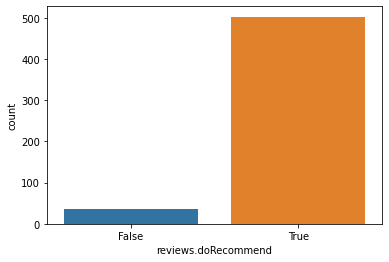

In [20]:
# we can also use countplot from seaborn to plot the above information graphically.
sns.countplot(dataset['reviews.doRecommend'])

#### `ASIN` & `Product_Name`

- There exist a lot of duplicates wherein the different products is reviewed by same user at the same time.
- The `ASIN` may be different but the `Product_Name` is similar with different variant.
- Our Hypothesis is that one `ASIN` id can have multiple `Product_Names`.

In [21]:
# ASIN & Product_Name
# Argument: Multiple Asins for One Product 

p_name = len(dataset["name"].unique())
p_asin = len(dataset["asins"].unique())

# Print Results
print('Number of ASINs in dataset :{:.2f}'.format(p_name))
print('Number of Product Names in dataset :{:.2f}'.format(p_asin))

Number of ASINs in dataset :62.00
Number of Product Names in dataset :54.00


Proof to back the claim.

In [22]:
# Proof there's multiple 'Asins' per product. 

dataset.groupby("asins")["name"].unique()

asins
B002Y27P3M                                                                                           [Kindle Keyboard]
B008GG93YE,B00LWHUBPO,B0051QYGXA                                                                              [Kindle]
B008GGCAVM,B00DOPNMVM                                                                              [Kindle Fire HD 7"]
B00CX5P8FC                                                                                            [Amazon Fire TV]
B00DOPNK14                                                                                         [Kindle Paperwhite]
B00DOPNLJ0                                                                                      [Kindle Fire HDX 8.9"]
B00DOPNO4M,B00BWYQ9YE,B00CYQPMJC,B00CUU1CGY,B00BWYRF7E,B00CYQP3AK                                 [Kindle Fire HDX 7"]
B00DU15MU4                                                           [Certified Refurbished Amazon Fire TV (Previou...
B00HX0SRXW                                

In [23]:
# Lets see all the name for this product that have 6 ASINs

popular_product = dataset[dataset["asins"] == "B00DOPNO4M,B00BWYQ9YE,B00CYQPMJC,B00CUU1CGY,B00BWYRF7E,B00CYQP3AK"]["name"].unique()
for name in popular_product:
    print(name)

Kindle Fire HDX 7"


In [24]:
# Let's dive deeper into the Hypothesis 

funny_user = dataset[dataset['asins'] == 'B00DOPNO4M,B00BWYQ9YE,B00CYQPMJC,B00CUU1CGY,B00BWYRF7E,B00CYQP3AK']
#Electronics.head()
funny_user['reviews.username'].value_counts()

NF                      15
Amazon Reviewer         13
Michael Gallagher       12
Del                      2
Richard Bouchard         1
Belinda G. Underhill     1
Deborah Ewert            1
Lady Lou                 1
BASig                    1
David G. Moore           1
Samuel Chell             1
Ginger Shields           1
Janice Mae Dunlevy       1
Carlos                   1
please let us know.      1
Name: reviews.username, dtype: int64

- In the above data we can see that 'NF' gave the multiple product reviews [ B00DOPNO4M,B00BWYQ9YE,B00CYQPMJC,B00CUU1CGY,B00BWYRF7E,B00CYQP3AK ] at the same time which is not possible ethically, the product were same but different flavours.

### Exploratory Data Analysis: `reviews.rating` Distribution. 

- The first step we would want to follow here is just to look at the distribution of the variables and try to make some notes. 
- First, let’s look at the distribution of the ratings.

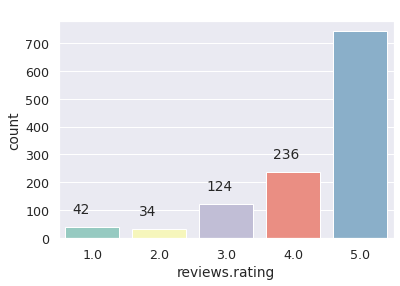

In [25]:
sns.set_theme(style='darkgrid',font_scale=1.15,palette="Set3")
ax=sns.countplot(x='reviews.rating',data=dataset)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    

**INTUITION**

The classes are quite imbalanced. Reviews with low/negative ratings are less.

### Exploratory Data Analysis: Conclusion. 

- After we've confirmed our hypothesis that each ASIN can have multiple Product Names. 
- Therefore we should only really concern ourselves with which ASINs do well, not the product names.

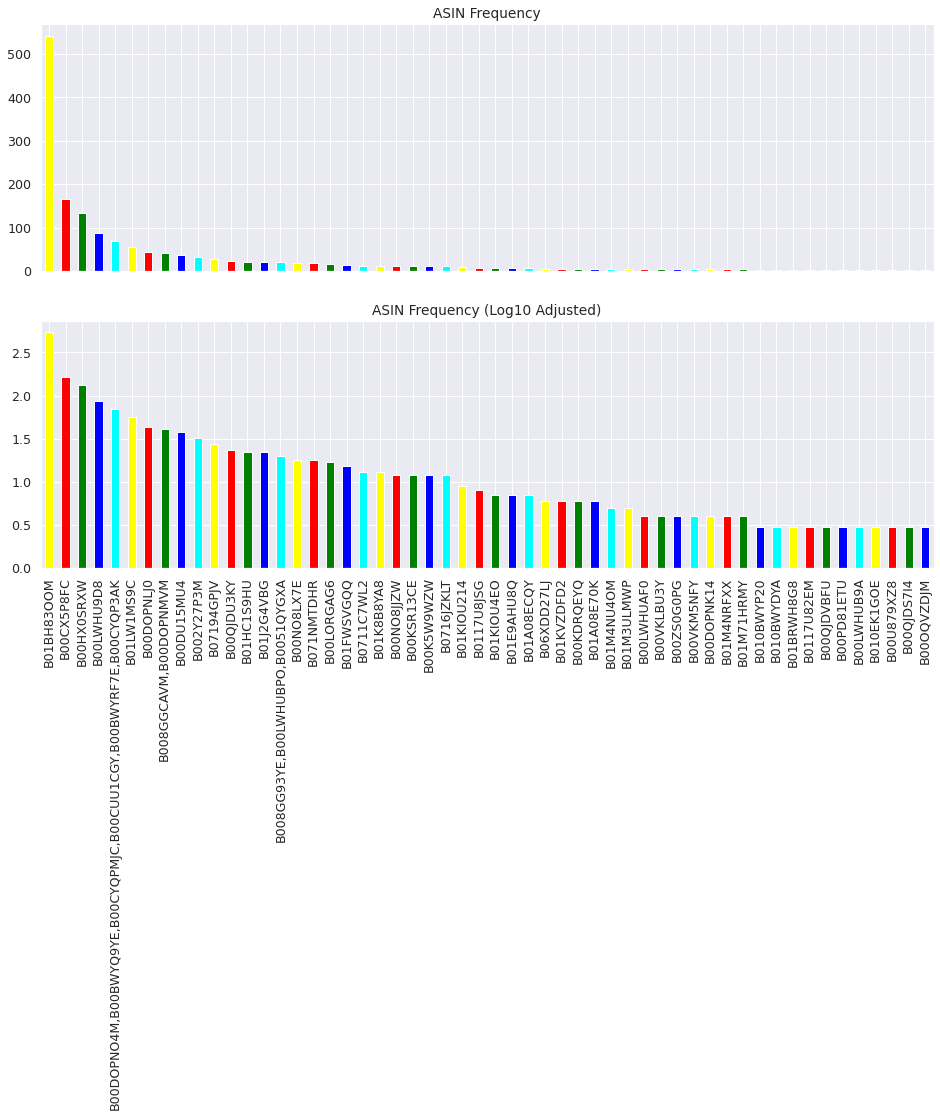

In [26]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
dataset["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency", color=['yellow', 'red', 'green', 'blue', 'cyan'])
np.log10(dataset["asins"].value_counts()).plot(kind="bar", ax=ax2, title="ASIN Frequency (Log10 Adjusted)", color=['yellow', 'red', 'green', 'blue', 'cyan']) 
plt.show()

### Exploratory Data Analysis: Visualizing the distributions of numerical variables.

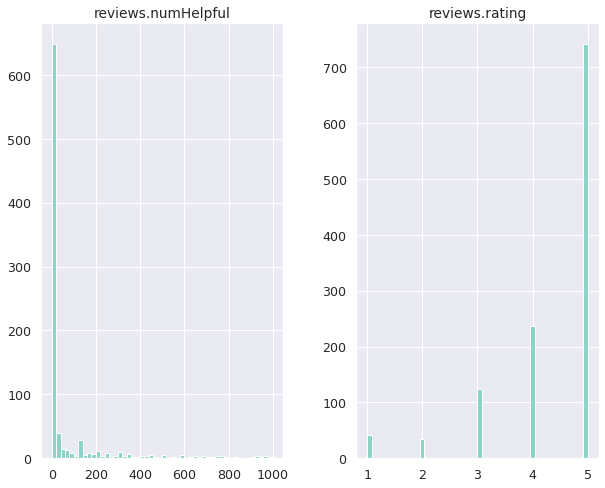

In [27]:
dataset.hist(bins=50, figsize=(10,8)) # builds histogram and set the number of bins and fig size (width, height)
plt.show()

`reviews.numHelpful`: Outliers in this case are valuable, so we may want to weight reviews that had more than 50+ people who find them helpful.

In [28]:
# #--- Monthly Reviews
# monthly = datset.groupby(['month'])['reviewerID'].count().reset_index()
# monthly['month'] = monthly['month'].apply(lambda x : calendar.month_name[x])
# monthly = monthly.rename(columns={'reviewerID':'no_of_reviews'})
# monthChart = sns.barplot(x='month',y='no_of_reviews',data=monthly, ax = axes[0,1])
# monthChart.set_title('No of reviews over month')
# monthChart.set_xticklabels(monthChart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

## Step 2: Data Wrangling


* The umbrella of `Data Cleaning`, `Data Transformation` and `Data-Preprocessing`.
* In this step we would take a look at our data and investigate on any null/nan values, data types, neccessary & unnecessary columns 
* Then finally perform some data cleaning to get our dataset ready for feature engineering.

Goals:

0. Format Columns
1. Handle Missing Values.
2. Drop Redundant Dataframe Columns.
3. Format date column to datime index.
4. Rename Columns.
5. Reset Dataframe Index.
6. Feature Engineering: `categories` , `name` &  `prices`  columns.
7. Save Clean_Dataset as CSV.
8. Create New Tables from clean data.

#### Step 2.1: Missing / NaN / Null data.

In [29]:
# Function Call to grab the Percentage of Missing Rows Per Column 

def missing(datasett):
    columns = datasett.columns
    print('MISSING ROWS per COLUMN')
    for column in columns:
        percentage = (datasett[column].isnull().sum() / len(datasett)) * 100
        print('{}: {}, {:0.2f}%'.format(column, datasett[column].isnull().sum(), percentage))
     
missing(dataset)

# call on our dataset.
print("Any missing value?", dataset.isnull().values.any())

MISSING ROWS per COLUMN
id: 0, 0.00%
asins: 0, 0.00%
brand: 0, 0.00%
categories: 0, 0.00%
colors: 823, 51.53%
dateAdded: 0, 0.00%
dateUpdated: 0, 0.00%
dimension: 1032, 64.62%
manufacturer: 632, 39.57%
manufacturerNumber: 695, 43.52%
name: 0, 0.00%
prices: 0, 0.00%
reviews.date: 380, 23.79%
reviews.doRecommend: 1058, 66.25%
reviews.numHelpful: 697, 43.64%
reviews.rating: 420, 26.30%
reviews.username: 17, 1.06%
weight: 911, 57.04%
Any missing value? True


### Step 2.1.2: Handling Missing Values

- Filling the missing values with right technique can change our results drastically.
- Also, there is no fixed rule of filling the missing values.
- No method is perfect for filling the missing values. 
- We need to use our common sense, our logic, or may need to see what works for that particular data set.

### Handling Missing Values in the `reviews.date` column.

In [30]:
# Dropping our data on a subset of the usernames that have messy data.

dataset = dataset.dropna(subset=['reviews.date'])

# Verify
print(dataset['reviews.date'].isnull().sum())

0


### Handling Missing Values in the `reviews.username` column.

In [31]:
# Dropping our data on a subset of the usernames that have messy data.

dataset = dataset.dropna(subset=['reviews.username'])

# Verify
print(dataset['reviews.username'].isnull().sum())

0


### Step 2.1.3: Handling Missing Values in the `reviews.rating` column

- Here we will me using the `Median` value of Review Ratings to replace our null values.
- Outliers affect the mean value of the data but have little effect on the `Median` or mode of a given set of data.

In [32]:
# Replace NaN values with the median
dataset['reviews.rating'] = dataset['reviews.rating'].fillna(dataset['reviews.rating'].median())

# Verify
print(dataset['reviews.rating'].isnull().sum())

0


### Step 2.1.4: Handling Missing Values in the `reviews.numHelpful` column

- Here we will use the median as our fillna value.

In [33]:
# Replace NaN values with Median.
dataset['reviews.numHelpful'] = dataset['reviews.numHelpful'].fillna(dataset['reviews.numHelpful'].median())

# Verify
print(dataset['reviews.numHelpful'].isna().sum())

0


### Step 2.1.5: Handling Missing Values in the `reviews.doRecommend` column.

* We were hesitant to drop this table, but later circled back to the theme of the project `reviews` 
* So we'll fill in the null values as `Uknown` : this could serve as a placer holder for finding fake accounts.
* Or help with security etc.

In [34]:
# Replace NaN values with Unknown.
dataset['reviews.doRecommend'].fillna('Unknown', inplace=True)

# Verify
print(dataset['reviews.doRecommend'].isna().sum())

0


### Handling Missing Values in the `manufacturer` column.

In [35]:
# Replace NaN values with Unknown.
dataset['manufacturer'].replace(np.nan, 'Unknown', inplace=True)

# Verify
print(dataset['manufacturer'].isnull().sum())

0


### Step 2.1.6: Dropping columns with high null values and keeping only important columns.

In [36]:
# lets see our tables
dataset.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'manufacturer', 'manufacturerNumber',
       'name', 'prices', 'reviews.date', 'reviews.doRecommend',
       'reviews.numHelpful', 'reviews.rating', 'reviews.username', 'weight'],
      dtype='object')

In [37]:
# Deleted column index from df
    
dataset.drop(['colors', 'dimension', 'manufacturerNumber', 'weight'], axis=1, inplace=True)

In [38]:
# lets see our tables
dataset.columns

Index(['id', 'asins', 'brand', 'categories', 'dateAdded', 'dateUpdated',
       'manufacturer', 'name', 'prices', 'reviews.date', 'reviews.doRecommend',
       'reviews.numHelpful', 'reviews.rating', 'reviews.username'],
      dtype='object')

### Step 2.1.7: Renaming Columns

 - To maintain readability.

In [39]:
# Rename
dataset.rename(columns = {'id':'id', 'asins':'Asins',
                              'brand':'Brand','categories':'Categories', 'dateAdded':'DateAdded', 'dateUpdated':'DateUpdated',  'manufacturer':'Product_Manufacturer', 'name':'Product_Name', 'prices':'Product_Price' , 'reviews.date':'Review_Date' , 'reviews.doRecommend':'Review_Recommendation' ,
                           'reviews.numHelpful':'Reviews_Helpful','reviews.rating':'Reviews_Rating', 'reviews.username':'Reviews_Username'},inplace = True)
   
# Verify the Column Rename
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1596
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1200 non-null   object 
 1   Asins                  1200 non-null   object 
 2   Brand                  1200 non-null   object 
 3   Categories             1200 non-null   object 
 4   DateAdded              1200 non-null   object 
 5   DateUpdated            1200 non-null   object 
 6   Product_Manufacturer   1200 non-null   object 
 7   Product_Name           1200 non-null   object 
 8   Product_Price          1200 non-null   object 
 9   Review_Date            1200 non-null   object 
 10  Review_Recommendation  1200 non-null   object 
 11  Reviews_Helpful        1200 non-null   float64
 12  Reviews_Rating         1200 non-null   float64
 13  Reviews_Username       1200 non-null   object 
dtypes: float64(2), object(12)
memory usage: 140.6+ KB


### `Product_Price` table.

In [40]:
# Using json library
import json

# json loads on Price table
prices=dataset['Product_Price'].apply(json.loads)

# New Dataframe table
df_prices=pd.DataFrame(prices.tolist())
product_price = pd.json_normalize(df_prices[0])
# dataset.drop('prices', inplace=True, axis=1)
product_price

,amountMax,amountMin,currency,dateAdded,dateSeen,isSale,merchant,shipping,sourceURLs,condition
0,139.99,139.99,USD,2017-07-18T23:52:58Z,"[2017-07-15T18:10:23.807Z, 2016-03-16T00:00:00Z]",false,Amazon.com,FREE Shipping.,[https://www.amazon.com/Kindle-Paperwhite-High...,NaN
1,139.99,139.99,USD,2017-07-18T23:52:58Z,"[2017-07-15T18:10:23.807Z, 2016-03-16T00:00:00Z]",false,Amazon.com,FREE Shipping.,[https://www.amazon.com/Kindle-Paperwhite-High...,NaN
2,139.99,139.99,USD,2017-07-18T23:52:58Z,"[2017-07-15T18:10:23.807Z, 2016-03-16T00:00:00Z]",false,Amazon.com,FREE Shipping.,[https://www.amazon.com/Kindle-Paperwhite-High...,NaN
3,139.99,139.99,USD,2017-07-18T23:52:58Z,"[2017-07-15T18:10:23.807Z, 2016-03-16T00:00:00Z]",false,Amazon.com,FREE Shipping.,[https://www.amazon.com/Kindle-Paperwhite-High...,NaN
4,139.99,139.99,USD,2017-07-18T23:52:58Z,"[2017-07-15T18:10:23.807Z, 2016-03-16T00:00:00Z]",false,Amazon.com,FREE Shipping.,[https://www.amazon.com/Kindle-Paperwhite-High...,NaN
...,...,...,...,...,...,...,...,...,...,...
1195,29.99,29.99,USD,2017-08-13T08:28:46Z,"[2017-07-25T23:50:10.867Z, 2017-07-25T23:45:16...",false,easy-to-open packaging,FREE Shipping.,[https://www.amazon.com/Alexa-Voice-Remote-Ama...,NaN
1196,29.99,29.99,USD,2017-08-13T08:28:46Z,"[2017-07-25T23:50:10.867Z, 2017-07-25T23:45:16...",false,easy-to-open packaging,FREE Shipping.,[https://www.amazon.com/Alexa-Voice-Remote-Ama...,NaN
1197,29.99,29.99,USD,2017-08-13T08:28:46Z,"[2017-07-25T23:50:10.867Z, 2017-07-25T23:45:16...",false,easy-to-open packaging,FREE Shipping.,[https://www.amazon.com/Alexa-Voice-Remote-Ama...,NaN
1198,29.99,29.99,USD,2017-08-13T08:28:46Z,"[2017-07-25T23:50:10.867Z, 2017-07-25T23:45:16...",false,easy-to-open packaging,FREE Shipping.,[https://www.amazon.com/Alexa-Voice-Remote-Ama...,NaN


In [41]:
# Check the info

product_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   amountMax   1200 non-null   float64
 1   amountMin   1200 non-null   float64
 2   currency    1200 non-null   object 
 3   dateAdded   1200 non-null   object 
 4   dateSeen    1200 non-null   object 
 5   isSale      1200 non-null   object 
 6   merchant    843 non-null    object 
 7   shipping    872 non-null    object 
 8   sourceURLs  1200 non-null   object 
 9   condition   253 non-null    object 
dtypes: float64(2), object(8)
memory usage: 93.9+ KB


- the dateSeencolumn has double entries for datetime. Dropped.

In [42]:
# Null Count
product_price.isnull().sum()

amountMax       0
amountMin       0
currency        0
dateAdded       0
dateSeen        0
isSale          0
merchant      357
shipping      328
sourceURLs      0
condition     947
dtype: int64

Let's inspect the null columns

In [43]:
product_price.merchant.value_counts()

Amazon.com                807
easy-to-open packaging     27
MobileRush                  9
Name: merchant, dtype: int64

In [44]:
product_price.shipping.value_counts()

FREE Shipping.                            732
FREE Shipping on orders over USD 25.00    140
Name: shipping, dtype: int64

In [45]:
product_price.condition.value_counts()

New    253
Name: condition, dtype: int64

Observation 

- The Missing Merchant entries can be set to 'Unknown'
- The shipping and condition would be dropped.

In [46]:
# Replace NaN values with Unknown.
product_price.merchant.replace(np.nan, 'Unknown', inplace=True)

# Verify
print(product_price.merchant.isnull().sum())

# lets see our tables
product_price.columns

# Deleted column index from df
product_price.drop(['shipping', 'condition', 'sourceURLs', 'dateSeen'], axis=1, inplace=True)

# Deleted Product_Price index from df
dataset.drop(['Product_Price'], axis=1, inplace=True)

0


In [47]:
product_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   amountMax  1200 non-null   float64
 1   amountMin  1200 non-null   float64
 2   currency   1200 non-null   object 
 3   dateAdded  1200 non-null   object 
 4   isSale     1200 non-null   object 
 5   merchant   1200 non-null   object 
dtypes: float64(2), object(4)
memory usage: 56.4+ KB


### Step 2.1.8: Validate Data Cleaning

In [48]:
# Function Call to grab the Percentage of Missing Rows Per Column 

def missing(datasett):
    columns = datasett.columns
    print('MISSING ROWS per COLUMN')
    for column in columns:
        percentage = (datasett[column].isnull().sum() / len(datasett)) * 100
        print('{}: {}, {:0.2f}%'.format(column, datasett[column].isnull().sum(), percentage))
     
missing(dataset)

# call on our dataset.

MISSING ROWS per COLUMN
id: 0, 0.00%
Asins: 0, 0.00%
Brand: 0, 0.00%
Categories: 0, 0.00%
DateAdded: 0, 0.00%
DateUpdated: 0, 0.00%
Product_Manufacturer: 0, 0.00%
Product_Name: 0, 0.00%
Review_Date: 0, 0.00%
Review_Recommendation: 0, 0.00%
Reviews_Helpful: 0, 0.00%
Reviews_Rating: 0, 0.00%
Reviews_Username: 0, 0.00%


And again on our new table product_price cause Data Professionals have to be certain.

In [49]:
missing(product_price)

MISSING ROWS per COLUMN
amountMax: 0, 0.00%
amountMin: 0, 0.00%
currency: 0, 0.00%
dateAdded: 0, 0.00%
isSale: 0, 0.00%
merchant: 0, 0.00%


## Step 3: Feature Engineering and Data Formatting

### Format `reviews.date` column

In [50]:
# Convert review dates into a datetime object
# Lambda Condition
condition = lambda row: pd.to_datetime(row)

# Apply on dateAdded and as new colum 'Prod.Date.Added '
dataset["Review_Date"] = dataset["Review_Date"].apply(condition)

# Split Review_Date by Quater, Month and Time of Day

## Y--M--D format
dataset["Review_Date"].dt.strftime('%Y-%m-%d')

# Extract Quater
dataset['Review_Quater'] =dataset['Review_Date'].dt.to_period('Q').dt.strftime('%Y-Q%q\'')

# Extract  Day/Night 
dataset["Review_TimeOfDay"] = pd.to_datetime(dataset['Review_Date'],unit='s').apply(lambda x: "Day" if x.hour >= 6 and x.hour <= 18 else "Night")

# Extract Review Month
dataset['Review_Month'] = dataset['Review_Date'].dt.month_name()

In [51]:
dataset.head(2)

,id,Asins,Brand,Categories,DateAdded,DateUpdated,Product_Manufacturer,Product_Name,Review_Date,Review_Recommendation,Reviews_Helpful,Reviews_Rating,Reviews_Username,Review_Quater,Review_TimeOfDay,Review_Month
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,Amazon,Kindle Paperwhite,2015-08-08 00:00:00+00:00,Unknown,139.0,5.0,Cristina M,2015-Q3',Night,August
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,Amazon,Kindle Paperwhite,2015-09-01 00:00:00+00:00,Unknown,126.0,5.0,Ricky,2015-Q3',Night,September


### Format `dateAdded` column & `dateUpdated` column to `datetime dtype`

`dateAdded`

In [52]:
# Convert review dates into a datetime object
# Lambda Condition
condition = lambda row: pd.to_datetime(row)

# Apply on dateAdded and as new colum ''
dataset["DateAdded"] = dataset["DateAdded"].apply(condition)


# ## Y--M--D format
# dataset["Added_Date"].dt.strftime('%Y-%m-%d')

# # Extract Quater
# dataset['Added_Quater'] =dataset['Added_Date'].dt.to_period('Q').dt.strftime('%Y-Q%q\'')

# # Extract  Day/Night 
# dataset["Added_Day"] = pd.to_datetime(dataset['Added_Date'],unit='s').apply(lambda x: "Day" if x.hour >= 6 and x.hour <= 18 else "Night")

# # Extract Review Month
# dataset['Added_Month'] = dataset['Added_Date'].dt.month_name()

`dateUpdated` table

In [53]:
# Apply on dateUpdated and as new colum ''
dataset["DateUpdated"] = dataset["DateUpdated"].apply(condition)


## Y--M--D format
dataset["DateUpdated"].dt.strftime('%Y-%m-%d')

# # Extract Quater
# dataset['Updated_Quater'] =dataset['Updated_Date'].dt.to_period('Q').dt.strftime('%Y-Q%q\'')

# # Extract  Day/Night 
# dataset["Updated_Day"] = pd.to_datetime(dataset['Updated_Date'],unit='s').apply(lambda x: "Day" if x.hour >= 6 and x.hour <= 18 else "Night")

# # Extract Review Month
# dataset['Updated_Month'] = dataset['Updated_Date'].dt.month_name()

0       2017-07-18
1       2017-07-18
2       2017-07-18
3       2017-07-18
4       2017-07-18
           ...    
1592    2017-08-13
1593    2017-08-13
1594    2017-08-13
1595    2017-08-13
1596    2017-08-13
Name: DateUpdated, Length: 1200, dtype: object

### Feature Engineering:  `Handling_Time`  : Time Diff

- We can perform calultations on tables of similar data types.
- There are several ways to calculate the time difference between two dates in Python using Pandas. 
- The first is to subtract one date from the other. 
- This returns a timedelta such as 0 days 05:00:00 that tells us the number of days, hours, minutes, and seconds between the two dates. T

In [54]:
dataset['Handling_Time'] = dataset['DateUpdated'] - dataset['DateAdded']

In [55]:
dataset

,id,Asins,Brand,Categories,DateAdded,DateUpdated,Product_Manufacturer,Product_Name,Review_Date,Review_Recommendation,Reviews_Helpful,Reviews_Rating,Reviews_Username,Review_Quater,Review_TimeOfDay,Review_Month,Handling_Time
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08 20:21:53+00:00,2017-07-18 23:52:58+00:00,Amazon,Kindle Paperwhite,2015-08-08 00:00:00+00:00,Unknown,139.0,5.0,Cristina M,2015-Q3',Night,August,497 days 03:31:05
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08 20:21:53+00:00,2017-07-18 23:52:58+00:00,Amazon,Kindle Paperwhite,2015-09-01 00:00:00+00:00,Unknown,126.0,5.0,Ricky,2015-Q3',Night,September,497 days 03:31:05
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08 20:21:53+00:00,2017-07-18 23:52:58+00:00,Amazon,Kindle Paperwhite,2015-07-20 00:00:00+00:00,Unknown,69.0,4.0,Tedd Gardiner,2015-Q3',Night,July,497 days 03:31:05
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08 20:21:53+00:00,2017-07-18 23:52:58+00:00,Amazon,Kindle Paperwhite,2017-06-16 00:00:00+00:00,Unknown,2.0,5.0,Dougal,2017-Q2',Night,June,497 days 03:31:05
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08 20:21:53+00:00,2017-07-18 23:52:58+00:00,Amazon,Kindle Paperwhite,2016-08-11 00:00:00+00:00,Unknown,17.0,5.0,Miljan David Tanic,2016-Q3',Night,August,497 days 03:31:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",2016-04-02 14:40:43+00:00,2017-08-13 08:28:46+00:00,Unknown,Alexa Voice Remote for Amazon Fire TV and Fire...,2016-07-06 00:00:00+00:00,Unknown,9.0,3.0,GregAmandawith4,2016-Q3',Night,July,497 days 17:48:03
1593,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",2016-04-02 14:40:43+00:00,2017-08-13 08:28:46+00:00,Unknown,Alexa Voice Remote for Amazon Fire TV and Fire...,2016-06-22 00:00:00+00:00,Unknown,41.0,1.0,Amazon Customer,2016-Q2',Night,June,497 days 17:48:03
1594,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",2016-04-02 14:40:43+00:00,2017-08-13 08:28:46+00:00,Unknown,Alexa Voice Remote for Amazon Fire TV and Fire...,2016-03-31 00:00:00+00:00,Unknown,34.0,1.0,Amazon Customer,2016-Q1',Night,March,497 days 17:48:03
1595,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",2016-04-02 14:40:43+00:00,2017-08-13 08:28:46+00:00,Unknown,Alexa Voice Remote for Amazon Fire TV and Fire...,2016-04-26 00:00:00+00:00,Unknown,7.0,3.0,Meg Ashley,2016-Q2',Night,April,497 days 17:48:03


In [56]:
dataset.columns

Index(['id', 'Asins', 'Brand', 'Categories', 'DateAdded', 'DateUpdated',
       'Product_Manufacturer', 'Product_Name', 'Review_Date',
       'Review_Recommendation', 'Reviews_Helpful', 'Reviews_Rating',
       'Reviews_Username', 'Review_Quater', 'Review_TimeOfDay', 'Review_Month',
       'Handling_Time'],
      dtype='object')

### Format `dateAdded` column to `datetime dtype`

In [57]:
# Change DataType

# Convert review dates into a datetime object
# Lambda Condition
condition = lambda row: pd.to_datetime(row)

# Apply on dateAdded and as new colum ''
product_price["Price_Date_Added"] = product_price["dateAdded"].apply(condition)

In [58]:
product_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   amountMax         1200 non-null   float64            
 1   amountMin         1200 non-null   float64            
 2   currency          1200 non-null   object             
 3   dateAdded         1200 non-null   object             
 4   isSale            1200 non-null   object             
 5   merchant          1200 non-null   object             
 6   Price_Date_Added  1200 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(2), object(4)
memory usage: 65.8+ KB


### Validate Transformation

In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1596
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   id                     1200 non-null   object             
 1   Asins                  1200 non-null   object             
 2   Brand                  1200 non-null   object             
 3   Categories             1200 non-null   object             
 4   DateAdded              1200 non-null   datetime64[ns, UTC]
 5   DateUpdated            1200 non-null   datetime64[ns, UTC]
 6   Product_Manufacturer   1200 non-null   object             
 7   Product_Name           1200 non-null   object             
 8   Review_Date            1200 non-null   datetime64[ns, UTC]
 9   Review_Recommendation  1200 non-null   object             
 10  Reviews_Helpful        1200 non-null   float64            
 11  Reviews_Rating         1200 non-null   float64          

### Update on Dataset:

In [60]:
per_missing = dataset.isnull().sum() *  100 / len(dataset)
per_missing

id                       0.0
Asins                    0.0
Brand                    0.0
Categories               0.0
DateAdded                0.0
DateUpdated              0.0
Product_Manufacturer     0.0
Product_Name             0.0
Review_Date              0.0
Review_Recommendation    0.0
Reviews_Helpful          0.0
Reviews_Rating           0.0
Reviews_Username         0.0
Review_Quater            0.0
Review_TimeOfDay         0.0
Review_Month             0.0
Handling_Time            0.0
dtype: float64

### Is there duplicate data?

In [61]:
dup_data = dataset.duplicated().any()
print("Are There Any Duplicate Values?", dup_data)

Are There Any Duplicate Values? True


In [62]:
#find duplicate rows across all columns
duplicateRows = dataset[dataset.duplicated()]

# Find Sum of Duplicate Rows
total_duplicate_rows = duplicateRows.value_counts().sum()

# Find Sum of Duplicate Rows
print("Number of Duplicate Data: ", total_duplicate_rows)

Number of Duplicate Data:  165


In [63]:
#Deleting all the duplicates having the same Asins, Reviews_Username, Review_Date and Product_Name all in the same column.

no_dup =  dataset.drop_duplicates(subset={"Asins","Reviews_Username","Review_Date","Review_Quater", "Review_TimeOfDay", "Review_Month", "Product_Name"},keep="first")

In [64]:
## There are still duplicates, 
## Word of caution for the Business Intelligence Analyst.

size_diff = no_dup['Asins'].size/dataset['Asins'].size
print("%.1f %% reduction in data after deleting duplicates"%((1-size_diff)*100))
print("Size of data",no_dup['Asins'].size," rows ")

17.0 % reduction in data after deleting duplicates
Size of data 996  rows 


### Closing Remarks on Data Wrangling

In [65]:
# reset index : maintain consistency within our tables
dataset.reset_index(inplace = True)


# Deleted column index from 
dataset.drop(['index'], axis=1, inplace=True)

In [66]:
dataset.head()

,id,Asins,Brand,Categories,DateAdded,DateUpdated,Product_Manufacturer,Product_Name,Review_Date,Review_Recommendation,Reviews_Helpful,Reviews_Rating,Reviews_Username,Review_Quater,Review_TimeOfDay,Review_Month,Handling_Time
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08 20:21:53+00:00,2017-07-18 23:52:58+00:00,Amazon,Kindle Paperwhite,2015-08-08 00:00:00+00:00,Unknown,139.0,5.0,Cristina M,2015-Q3',Night,August,497 days 03:31:05
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08 20:21:53+00:00,2017-07-18 23:52:58+00:00,Amazon,Kindle Paperwhite,2015-09-01 00:00:00+00:00,Unknown,126.0,5.0,Ricky,2015-Q3',Night,September,497 days 03:31:05
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08 20:21:53+00:00,2017-07-18 23:52:58+00:00,Amazon,Kindle Paperwhite,2015-07-20 00:00:00+00:00,Unknown,69.0,4.0,Tedd Gardiner,2015-Q3',Night,July,497 days 03:31:05
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08 20:21:53+00:00,2017-07-18 23:52:58+00:00,Amazon,Kindle Paperwhite,2017-06-16 00:00:00+00:00,Unknown,2.0,5.0,Dougal,2017-Q2',Night,June,497 days 03:31:05
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",2016-03-08 20:21:53+00:00,2017-07-18 23:52:58+00:00,Amazon,Kindle Paperwhite,2016-08-11 00:00:00+00:00,Unknown,17.0,5.0,Miljan David Tanic,2016-Q3',Night,August,497 days 03:31:05


In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   id                     1200 non-null   object             
 1   Asins                  1200 non-null   object             
 2   Brand                  1200 non-null   object             
 3   Categories             1200 non-null   object             
 4   DateAdded              1200 non-null   datetime64[ns, UTC]
 5   DateUpdated            1200 non-null   datetime64[ns, UTC]
 6   Product_Manufacturer   1200 non-null   object             
 7   Product_Name           1200 non-null   object             
 8   Review_Date            1200 non-null   datetime64[ns, UTC]
 9   Review_Recommendation  1200 non-null   object             
 10  Reviews_Helpful        1200 non-null   float64            
 11  Reviews_Rating         1200 non-null   float64          

* Great, our data tables look much better now with 1200 entries per column.

## Observation for the Business Intelligence Analyst:


- There will be duplicate data; `ASINs` have mutiple `Product_Names`
- Therefore we should only really concern ourselves with which `ASINs` do well, not the `Product_Names`.

#### Class Imbalance: `reviews.doRecommend` table.

- Here we will observe the distribution of our classes.
- We can see that the column is badly imbalanced and for the purpose of clean analysis we will be dropping this column.
- This will affect the quality of any time series model we build, class balacing techniques such as SMOTE could be used. 


#### Class Imbalance: `reviews.rating` table.

- There are more positive rating that others.
- Majority of examples were rated highly (looking at rating distribution). 
- There is twice amount of 5 star ratings than the others ratings combined
- Singfinicantly lower, high bias towards positive ratings.
- We can see that the column is badly imbalanced and for the purpose of clean analysis we will be dropping this column.


#### Outliers: `reviews.numHelpful`: Outliers in this case are valuable, so we may want to weight reviews that had more than 50+ people who find them helpful.


#### Parsing Issue: `dateSeen`: The `dateSeen` column in the product_price table seems to have two timestamps in one entry.

## Step 4: Final Format.



In [71]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   id                     1200 non-null   object             
 1   Asins                  1200 non-null   object             
 2   Brand                  1200 non-null   object             
 3   Categories             1200 non-null   object             
 4   DateAdded              1200 non-null   datetime64[ns, UTC]
 5   DateUpdated            1200 non-null   datetime64[ns, UTC]
 6   Product_Manufacturer   1200 non-null   object             
 7   Product_Name           1200 non-null   object             
 8   Review_Date            1200 non-null   datetime64[ns, UTC]
 9   Review_Recommendation  1200 non-null   object             
 10  Reviews_Helpful        1200 non-null   float64            
 11  Reviews_Rating         1200 non-null   float64          

In [76]:
dataset.to_csv('amazon_clean', encoding='utf-8', index=False)

In [ ]:
# Export to CSv

In [72]:
product_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   amountMax         1200 non-null   float64            
 1   amountMin         1200 non-null   float64            
 2   currency          1200 non-null   object             
 3   dateAdded         1200 non-null   object             
 4   isSale            1200 non-null   object             
 5   merchant          1200 non-null   object             
 6   Price_Date_Added  1200 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(2), object(4)
memory usage: 65.8+ KB


In [77]:
product_price.to_csv('amazon_price', encoding='utf-8', index=False)

Thank you for your time.